In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

     |████████████████████████████████| 264 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 45.5 MB/s 
     |████████████████████████████████| 105 kB 58.9 MB/s 
     |████████████████████████████████| 6.8 MB 47.8 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 2.0 MB 36.3 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 14.4 MB 57 kB/s 
     |████████████████████████████████| 167 kB 65.4 MB/s 
     |████████████████████████████████| 271 kB 70.8 MB/s 
     |████████████████████████████████| 1.7 MB 26.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 58.3 MB/s 
     |████████████████████████████████| 10.1 MB 31.0 MB/s 
     |████████████████████████████████| 62 kB 717 kB/s 
     |████████████████████

In [ ]:
import pandas as pd
from pycaret.classification import *

In [ ]:
df=pd.read_csv("/content/final_data.csv")
df.head()

,Unnamed: 0,index,date,username,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,index.1,negative,neutral,positive,positve,very,has_mental_impact
0,0,0,17522,5618,5,4,1826,0,1,0,0,0,1,0,0,0,0,0
1,1,1,17519,22628,5,4,858,4,1,0,0,1,1,0,0,0,1,0
2,2,2,17387,2390,5,0,1378,4,1,0,0,2,1,0,0,0,1,0
3,3,3,17468,2623,5,2,1478,4,1,0,0,3,1,0,0,0,1,0
4,4,4,17399,16822,5,0,1250,4,1,0,0,4,1,0,0,0,1,0


In [ ]:
df.drop(columns=["Unnamed: 0","index",
                 "username","index.1"],inplace=True)
data = df.sample(frac=0.90, random_state=42)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (73822, 14)
Unseen Data For Predictions: (8202, 14)


In [ ]:
exp_clf101= setup(data=data, target='has_mental_impact',session_id=123)

,Description,Value
0,session_id,123
1,Target,has_mental_impact
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(73822, 14)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.065
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,0.9997,0.9998,0.9998,0.9998,0.069
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.396
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.551
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.628
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.253
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.407
qda,Quadratic Discriminant Analysis,0.9900,0.9118,0.8236,1.0000,0.8787,0.8748,0.8892,0.139
lr,Logistic Regression,0.9887,0.9734,0.8041,0.9212,0.8079,0.8072,0.8208,0.800
lda,Linear Discriminant Analysis,0.9822,1.0000,1.0000,0.7621,0.8646,0.8553,0.8646,0.299


In [ ]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9435,0.8738,0.0205,0.5455,0.0395,0.0355,0.0976
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9437,0.8601,0.0204,0.6667,0.0396,0.0363,0.1100
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
tuned_lr= tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


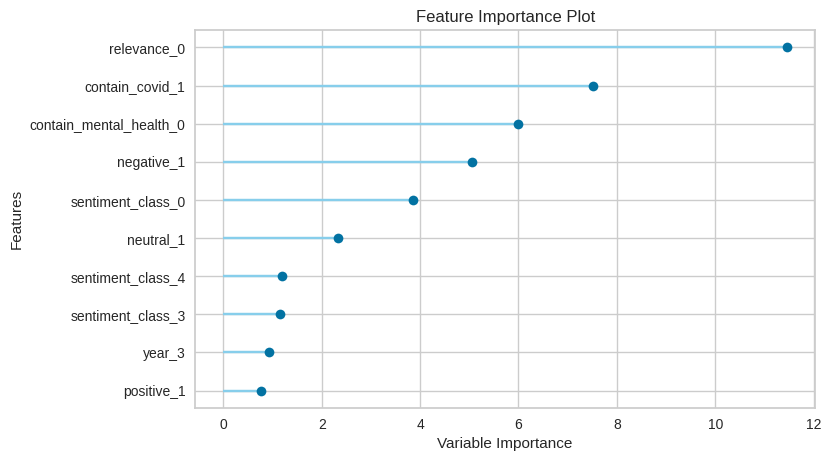

In [ ]:
plot_model(tuned_lr, plot='feature')

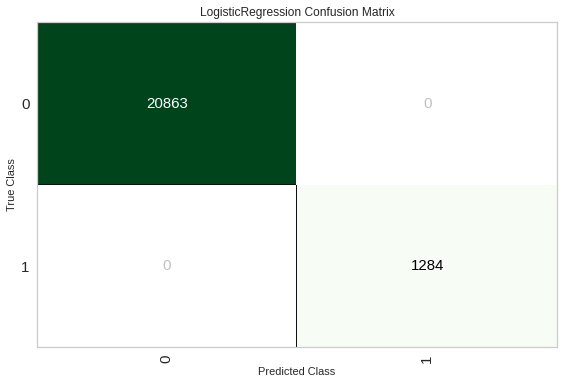

In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
final_lr = finalize_model(tuned_lr)

In [ ]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,date,year,month,sentiment_score,sentiment_class,contain_mental_health,contain_covid,relevance,negative,neutral,positive,positve,very,has_mental_impact,Label,Score
0,17387,5,0,1378,4,1,0,0,1,0,0,0,1,0,0,1.0000
1,17534,5,5,3193,2,1,1,1,0,0,1,0,0,0,0,1.0000
2,17469,5,2,1506,4,1,0,0,1,0,0,0,1,0,0,1.0000
3,17478,5,3,453,4,1,0,0,1,0,0,0,1,0,0,0.9996
4,17457,5,2,876,4,1,0,0,1,0,0,0,1,0,0,1.0000


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['has_mental_impact'], unseen_predictions['Label'], metric = 'Accuracy')

1.0